In [5]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [27]:
# Get the Stock quote
df = web.DataReader('AAPL',data_source='yahoo', start='2012-01-01' , end='2022-11-23')

# Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.519280
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.586557
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.726294
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.859332
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.838935
...,...,...,...,...,...,...
2022-11-16,149.869995,147.289993,149.130005,148.789993,64218300.0,148.789993
2022-11-17,151.479996,146.149994,146.429993,150.720001,80389400.0,150.720001
2022-11-18,152.699997,149.970001,152.309998,151.289993,74794600.0,151.289993


In [28]:
df.shape

(2742, 6)

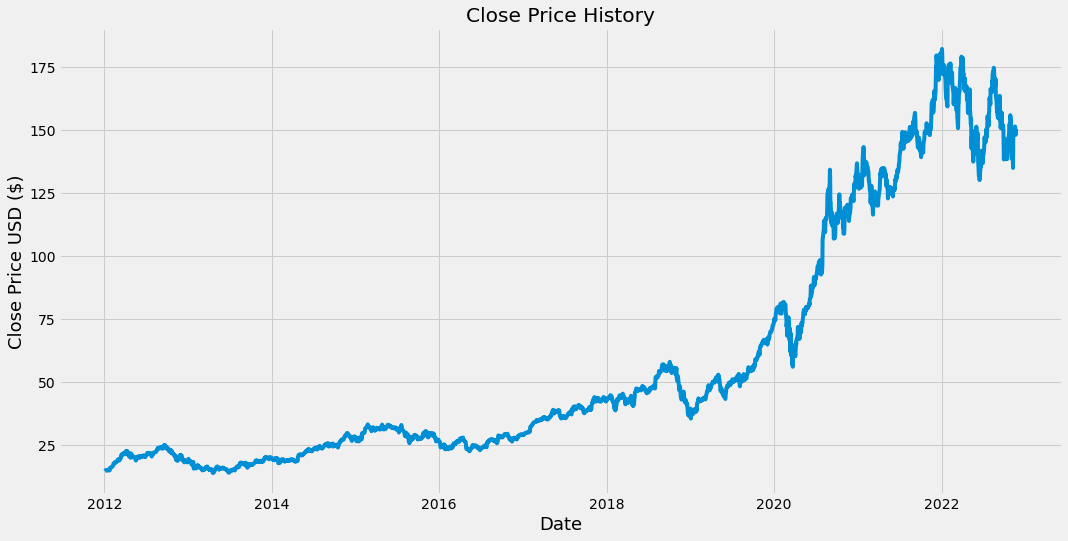

In [29]:
# Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [30]:
#Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values


# Get the number of rows to train the model on 
training_data_len = math.ceil(len(dataset)*.8)

training_data_len
# dataset

2194

In [31]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.81721085],
       [0.7976943 ],
       [0.81060616]])

In [32]:
#Create training data set
# Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60 , len(train_data)):
    x_train.append(train_data[i-60:i , 0])
    y_train.append(train_data[i,0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.0063263 , 0.00783722, 0.00634968,
       0.01192796, 0.01149658, 0.01205972, 0.01327737, 0.01401476,
       0.01395314, 0.01372576, 0.01469479, 0.01560643, 0.01663922,
       0.01830739, 0.02181161, 0.02186474, 0.02381555, 0.02527333,
       0.0227679 , 0.02373267, 0.02371354, 0.02641875, 0.02603411,
       0.026746  , 0.02802528, 0.02873719, 0.03078787, 0.03228178,
       0.03271317, 0.03286405, 0.03030973, 0.02969346, 0.02978484,
       0.03218616, 0.03286193, 0.03431335, 0.03773469, 0.04229932,
       0.04144504, 0.04144716, 0.04474738, 0.04578017, 0.04504489,
       0.04437338, 0.04367423, 0.04599691, 0.04759072, 0.04825798])]
[0.04660893460974819]

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.00

In [33]:
# Convert the x_train and y_train to numpy array
x_train , y_train = np.array(x_train) , np.array(y_train)


In [34]:
# Reshape the data
x_train = np.reshape(x_train , (x_train.shape[0] , x_train.shape[1] , 1))
x_train.shape

(2134, 60, 1)

In [35]:
# Build the LSTM Model 
model = Sequential()
model.add(LSTM(50, return_sequences = True , input_shape = (x_train.shape[1] , 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [36]:
#compile the model 
model.compile(optimizer='adam',loss='mean_squared_error')

In [37]:
# Train the model
model.fit(x_train, y_train , batch_size=1 , epochs=1)

2134/2134 [==============================] - 43s 19ms/step - loss: 5.9168e-04


In [38]:
# Create the testing data set
# Create a new array containing scaled values from index 2074 to 2534
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len: , :]
for i in range(60 , len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    

In [39]:
# convert the data to a numpy array
x_test = np.array(x_test)

In [40]:
# Reshape the data
x_test = np.reshape(x_test , (x_test.shape[0], x_test.shape[1] , 1))


In [41]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

18/18 [==============================] - 1s 11ms/step


In [45]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean( (predictions - y_test)**2))
rmse

34.09447734533518

/tmp/ipykernel_7147/2655527635.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions + rmse


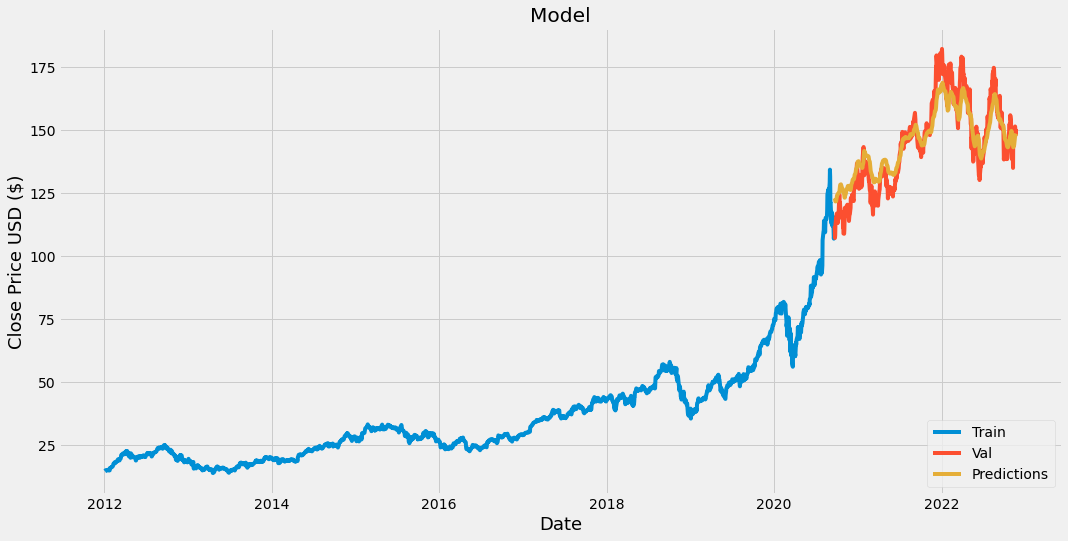

In [47]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions + rmse
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Val','Predictions'],loc = 'lower right')
plt.show()

In [48]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2020-09-22,111.809998,122.847427
2020-09-23,107.120003,122.561401
2020-09-24,108.220001,122.038971
2020-09-25,112.279999,121.596359
2020-09-28,114.959999,121.633789
...,...,...
2022-11-16,148.789993,145.921219
2022-11-17,150.720001,146.716141
2022-11-18,151.289993,147.489304


In [55]:
# Get the quote
apple_quote = web.DataReader('AAPL',data_source='yahoo',start='2012-01-01',end='2022-11-24')
# Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-2074:].values
#Scale the data to be values between 0 to 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
# Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test , (X_test.shape[0],X_test.shape[1],1))
# Get the predicted scaled price
pred_price = model.predict(X_test)
# Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 139ms/step
[[114.60378]]


In [56]:
# Get the quote
apple_quote2 = web.DataReader('AAPL',data_source='yahoo',start='2022-11-24',end='2022-11-24')
print(apple_quote2['Close'])

KeyError: 'Date'